Python's isinstance() function is a built-in method used to check if an object is an instance of a particular class or type. It's widely used in Python code for type checking and handling different types of objects.

In [1]:
import pstats 
stats = pstats.Stats('profile_stats')
stats.strip_dirs().sort_stats('tottime').print_stats()

Mon Mar 25 16:55:36 2024    profile_stats

         493933937 function calls (486250511 primitive calls) in 842.283 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1  267.768  267.768  267.797  267.797 retrieve_data.py:39(number_matches_for_all_k)
        1  225.207  225.207  806.954  806.954 retrieve_data.py:80(main)
  7587678   45.016    0.000   78.159    0.000 shape_base.py:1191(tile)
        1   35.326   35.326  842.280  842.280 <string>:1(<module>)
 12363841   28.083    0.000  108.411    0.000 series.py:992(__getitem__)
26588915/19001227   24.820    0.000  134.338    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
 12363841   19.453    0.000   50.031    0.000 series.py:1099(_get_value)
 33889505   18.268    0.000   18.268    0.000 {method 'copy' of 'numpy.ndarray' objects}
 11381517   14.766    0.000   14.766    0.000 {method 'repeat' of 'numpy.ndarray' objects}
 12363857   12.622 

The output of `cProfile.run()` can be a bit overwhelming at first, but it provides valuable information about the performance of your code. Here's a breakdown of the data you typically see:

1. **ncalls**: The number of calls made to the function.
2. **tottime**: The total time spent in the function, excluding time spent in sub-functions.
3. **percall**: The average time spent per function call, which is `tottime` divided by `ncalls`.
4. **cumtime**: The cumulative time spent in the function, including time spent in sub-functions.
5. **percall**: The average time spent per function call, including sub-function calls, which is `cumtime` divided by `ncalls`.
6. **filename:lineno(function)**: Information about where the function is defined in your code.

Here's how you can interpret this data:

- **`tottime` vs `cumtime`**: If you're looking to optimize a specific function, focus on the `tottime`. If you're looking to optimize overall program performance, focus on `cumtime`.
- **`percall`**: Helps you understand the average cost of calling the function.
- **`ncalls`**: Tells you how many times the function was called, which is useful for identifying heavily used functions that might be worth optimizing.

To read the data without running the code again, you can save the output of `cProfile.run()` to a file and then analyze it using tools like `pstats`. Here's how:

```python
import cProfile
import pstats

# Run the code and save profiling data to a file
cProfile.run('your_script_name.main()', 'profile_stats')

# Load the saved profiling data
stats = pstats.Stats('profile_stats')

# Print statistics
stats.strip_dirs().sort_stats(-1).print_stats()
```

This will print the profiling statistics in a more readable format. You can also use various methods provided by the `pstats.Stats` class to filter and sort the data according to your needs.

104.71975511965978


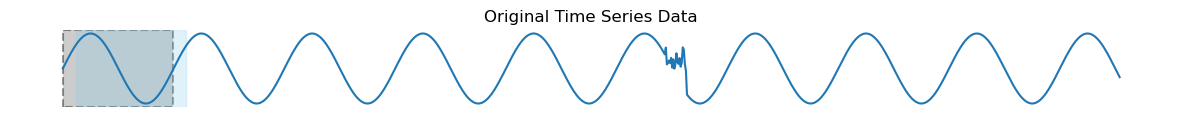

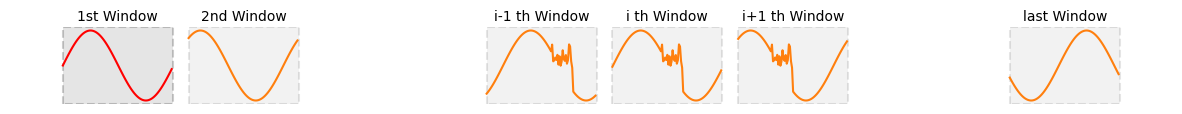

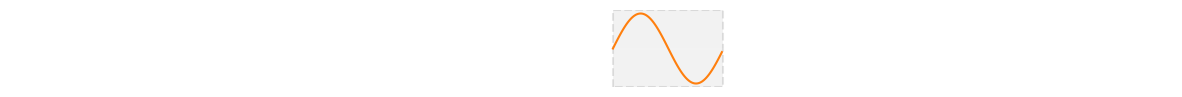

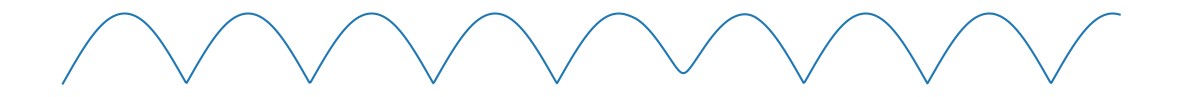

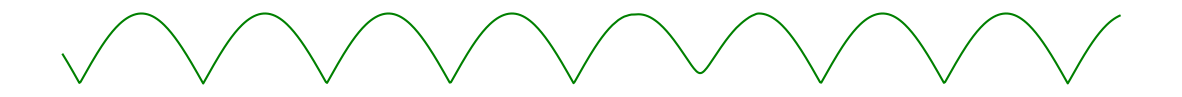

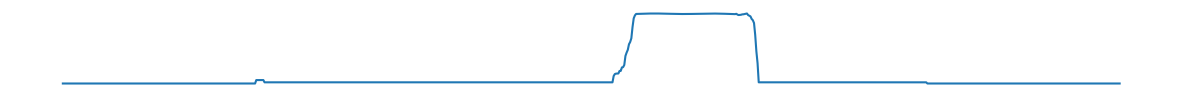

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stumpy


# Generate synthetic time series data
# np.random.seed(10)
n = 1000
time = np.arange(n)
frequency = 0.06
data = (np.sin(frequency * time))**1#+ 0.09 * np.random.randn(n)  # Add some noise
data[570:590] = np.sin(0.01 * len(data[570:590])) + 0.2 * np.random.randn(20)

# Calculate period
period = 2 * np.pi / frequency
print(period)
# Plot the original time series data
plt.figure(figsize=(15, 1))
plt.plot(time, data)
plt.title('Original Time Series Data')
# plt.xlabel('Time')
# plt.ylabel('Value')

# Subsequence length
m = int(period)  # Window size for matrix profile calculation
highlight_index = 500  # Example index for subsequence
plt.axvspan(0, m, facecolor='gray', alpha=0.4, label='Window 1', edgecolor='black', linewidth=1.5,linestyle="--")
plt.axvspan(12, 12 + m, color='skyblue', alpha=0.25, label='Window 2')

plt.gca().axis('off')  # Turn off the axis
plt.show()


###########################################     ###########################################################

alp =15 
highlight_index = 500  # Example index for subsequence

for i in range(2):
    print()

# Creating the plot
plt.figure(figsize=(15, 1))  # Set frameon to False to remove the frame

error_bar=int(0.71975511965978*5.5)
# print(error_bar,0.71975511965978*5)
# Define segments
segments = [
    (time[0:m], data[0:m], 'red', '1st Window'),
    (time[m+alp:alp + 2*m], data[alp: alp + m], 'C1', '2nd Window'),
    (time[5*m-alp-m:5*m-alp], data[5*m-alp+error_bar:5*m+m-alp+error_bar], 'C1', 'i-1 th Window'),
    (time[5*m:5*m+m], data[5*m+error_bar:5*m+m+error_bar], 'C1', 'i th Window'),
    (time[5*m+alp+m:5*m+m+alp+m], data[5*m+alp+error_bar:5*m+m+alp+error_bar], 'C1', 'i+1 th Window'),
    (time[-m:], data[-m:], 'C1', 'last Window')
]

# Plot the curves and add labels
for seg_time, seg_data, color, label in segments:
    plt.plot( seg_time, seg_data, color=color)
    mid_index = len(seg_time) // 2  # Middle index of the segment
    max_val = max(seg_data)  # Maximum value of the segment data
    plt.text(seg_time[mid_index], max_val + 0.15 * (max_val - min(seg_data)), label, color='black', horizontalalignment='center')


# plt.axvspan(0, m, facecolor='gray', alpha=0.2, edgecolor='black', linewidth=1.5, linestyle="--")
# plt.axvspan(m+alp, alp + 2*m, facecolor='gray', alpha=0.1, edgecolor='black', linewidth=1.5, linestyle="--")
# plt.axvspan(550-alp-m, 550-alp, facecolor='gray', alpha=0.1, edgecolor='black', linewidth=1.5, linestyle="--")
# plt.axvspan(550,550+m, facecolor='gray', alpha=0.1,  edgecolor='black', linewidth=1.5, linestyle="--")
# plt.axvspan(550+alp+m,550+m+alp+m, facecolor='gray', alpha=0.1,edgecolor='black', linewidth=1.5, linestyle="--")
# plt.axvspan(len(data)-m, len(data), facecolor='gray', alpha=0.1,edgecolor='black', linewidth=1.5, linestyle="--")
# Define spans as a list of tuples, each tuple contains start and end of the span
spans = [
    (0, m),
    (m + alp, alp + 2 * m),
    (5*m - alp - m, 5*m - alp),
    (5*m, 5*m + m),
    (5*m + alp + m, 5*m + m + alp + m),
    (len(data) - m, len(data))
]

# Common properties
facecolor = 'gray'
edgecolor = 'black'
linewidth = 1.5
linestyle = "--"

# Plot each span using a loop
for start, end in spans:
    plt.axvspan(start, end, facecolor=facecolor, alpha=0.1 if start != 0 else 0.2, 
                edgecolor=edgecolor, linewidth=linewidth, linestyle=linestyle)

# plt.plot(time[2*m+alp+m: 2*m+2*m], data[m+alp+m: 2*m+m]*0, c='C1', label='2nd Window',marker=".")



# Remove all axes and frame
plt.gca().axis('off')  # Turn off the axis
plt.ylabel('\nSubsequence set\n\n')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_ticks([])
plt.gca().yaxis.set_ticks([])
plt.show()

for i in range(2):
    print()
    
############################################# Plotting the queries #############################################

# Compute the matrix profile using stumpy
matrix_profile = stumpy.stump(data, m)
query_subsequence = data[0: m]
plt.figure(figsize=(15, 1))
plt.plot(time, data*0, color='white', alpha=0.1)

# for i in range(5):
#     query_index = i*m + i*alp # This is the index of the first subsequence
query_index = 5*m
plt.plot(time[query_index:query_index + m], query_subsequence, color=color)
plt.axvspan(query_index,query_index +m, facecolor=facecolor, alpha=0.1, edgecolor=edgecolor, linewidth=linewidth, linestyle=linestyle)

plt.gca().axis('off')  # Turn off the axis

# plt.legend()
plt.show()
# Compute the distance profile using the MASS algorithm
distance_profile = stumpy.mass(query_subsequence, data)


############################################# Plotting the first distance profile #############################################

plt.figure(figsize=(15, 1))
plt.plot(distance_profile)
plt.gca().axis('off')  # Turn off the axis
plt.show()

############################################# Plotting the second distance profile #############################################

query_subsequence_2 =  data[m + alp : alp + 2 * m]#[m: 2*m]
distance_profile_2 = stumpy.mass(query_subsequence_2, data)

# Plotting the second distance profile
plt.figure(figsize=(15, 1))
plt.plot(distance_profile_2, color='green')
# plt.title('Second Distance Profile')
plt.gca().axis('off')  # Turn off the axis
plt.show()

for i in range(2):
    print()
    
#############################################    Plot the matrix profile    #############################################


plt.figure(figsize=(15, 1))
plt.plot(matrix_profile[:, 0])#, label='Matrix Profile')
# plt.title('Matrix Profile')
plt.xlabel('TIme')
# plt.ylabel('\nMatrix Profile\n')
plt.gca().axis('off')  # Turn off the axis
# # Highlight the minimum value in the matrix profile
# min_mp_idx = np.argmin(matrix_profile[:, 0])
# plt.scatter(min_mp_idx, matrix_profile[min_mp_idx, 0], color='red', label='Minimum MP Value', zorder=5)

# plt.legend()
plt.show()
